In [87]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

In [88]:
testing_results_path = "/workspace/nem/NEM/test/testing_results.csv"

df_results = pd.read_csv(testing_results_path, index_col=0)

In [89]:
def format_(x): return(round(float(x[2:-2]),2))

def max_100(x): 
    if x>100: return 100
    else: return x

def difference(row):
    return(abs(row['predictions'] - row['noise_score']))

In [90]:
df_results['predictions'] = df_results['predictions'].apply(format_)
df_results['predictions'] = df_results['predictions'].apply(max_100)

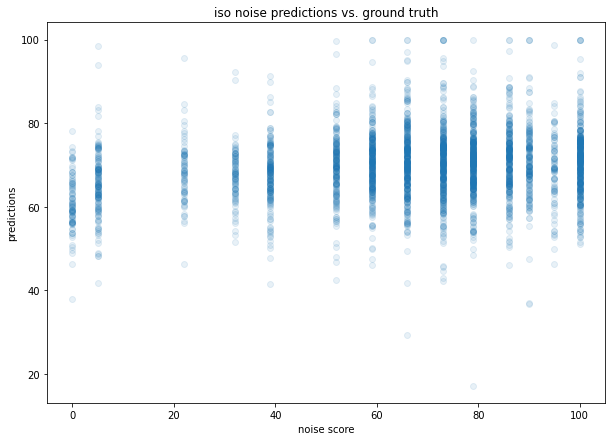

In [91]:
noise_type = 'iso'

plt.figure(figsize=(10,7))
plt.scatter(x=df_results[df_results['noise_type'] == noise_type]['noise_score'], 
            y=df_results[df_results['noise_type'] == noise_type]['predictions'], 
            alpha=.1)
plt.title(f"{noise_type} noise predictions vs. ground truth")
plt.ylabel("predictions")
plt.xlabel("noise score")
plt.show()

In [34]:
df_results

,image_path,noise_type,noise_value,noise_score,predictions
0,/workspace/datasets/noise_dataset/images/real_...,iso,0,100,72.64
1,/workspace/datasets/noise_dataset/images/real_...,gaussian,160,60,40.09
2,/workspace/datasets/noise_dataset/images/real_...,iso,40,90,90.83
3,/workspace/datasets/noise_dataset/images/real_...,iso,80,79,71.45
4,/workspace/datasets/noise_dataset/images/food_...,iso,140,59,79.06
...,...,...,...,...,...
4077,/workspace/datasets/noise_dataset/images/real_...,gaussian,100,80,66.34
4078,/workspace/datasets/noise_dataset/images/real_...,gaussian,160,60,55.65
4079,/workspace/datasets/noise_dataset/images/real_...,iso,40,90,73.40
4080,/workspace/datasets/noise_dataset/images/real_...,iso,0,100,86.29


In [71]:
error = df_results.apply(difference, axis=1)

In [76]:
error.mean()

19*19

361

<AxesSubplot:>

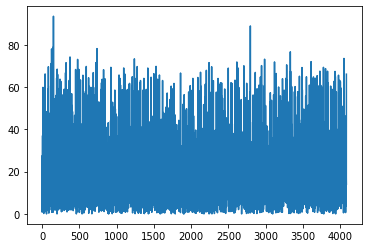

In [72]:
sns.lineplot(data=error)